# Aim: Descriptive stats on the preprocessed dataset

# Setup

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

import lib_dataimport
import lib_processing
import importlib
lib_dataimport = importlib.reload(lib_dataimport)
lib_processing = importlib.reload(lib_processing)

In [46]:
def darkmode(foreground="0.85", background="0.15"):
	''' Switch on darkmode. Foreground and background colours may also be specified explicitly. '''
	_set_fgbg(fg=foreground, bg=background)

def lightmode(foreground="0", background="1.0"):
	''' Switch on lightmode. Foreground and background colours may also be specified explicitly. '''
	_set_fgbg(fg=foreground, bg=background)


#############################
# Internal helper functions #
#############################

def _set_fgbg(fg, bg):
	plt.rcParams.update({
		"lines.color": fg,
		"patch.edgecolor": fg,
		"text.color": fg,
		"axes.facecolor": bg,
		"axes.edgecolor": fg,
		"axes.labelcolor": fg,
		"xtick.color": fg,
		"ytick.color": fg,
		"grid.color": fg,
		"figure.facecolor": bg,
		"figure.edgecolor": bg,
		"savefig.facecolor": bg,
		"savefig.edgecolor": bg})
    
darkmode()

In [2]:
df = lib_dataimport.read_data()

# Number of letters

In [4]:
len(df)

963

Goethe      521
Schiller    442
Name: Author, dtype: int64


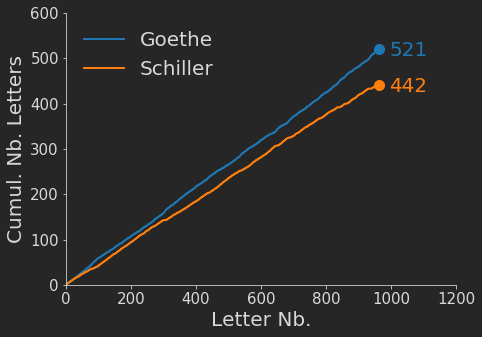

In [55]:
# Sum of letters written by G. and S. respectively:
print(df.Author.value_counts())

# Calculate cumulative numbers of letters written by G. and S. over time
df["cum_counts_G"] = np.cumsum([1 if author == "Goethe" else 0 for author in df.Author])
df["cum_counts_S"] = np.cumsum([1 if author == "Schiller" else 0 for author in df.Author])

# Generate plot and make visually more pleasing
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Cumul. Nb. Letters", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(df.cum_counts_G, lw=2, label="Goethe")
ax.plot(df.cum_counts_S, lw=2, label="Schiller")
ax.set_xlim((0,1200))
ax.set_ylim((0,600))
ax.legend(loc=2, frameon=False, fontsize=20)
ax.scatter(963, df.Author.value_counts()["Goethe"], s=100)
ax.scatter(963, df.Author.value_counts()["Schiller"], s=100)
ax.text(963+30, df.Author.value_counts()["Goethe"]-15, df.Author.value_counts()["Goethe"], c="C0", size=20)
ax.text(963+30, df.Author.value_counts()["Schiller"]-15, df.Author.value_counts()["Schiller"], c="C1", size=20)
plt.savefig("Fig1.svg")

# Length of Letters

Author
Goethe      1544.988484
Schiller    2026.092760
Name: length, dtype: float64


/home/mmf/anaconda3/envs/python3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


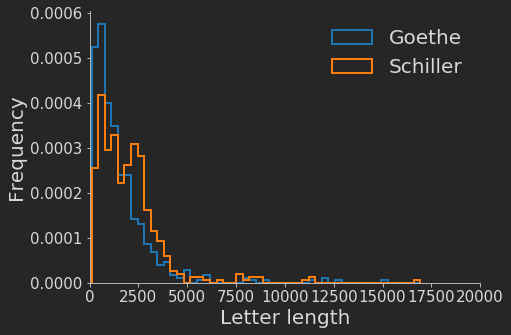

In [52]:
# Calculate length of every letter
df["length"] = [len(l) for l in df.Content]
print(df.groupby("Author").mean().length)

# Plot distribution of letter lenghts
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlabel("Letter length", size=20)
ax.set_ylabel("Frequency", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,20000))
ax.hist([df[df.Author=="Schiller"].length, df[df.Author=="Goethe"].length],
        bins=50, histtype="step", density=True, alpha=.99, label=["Schiller", "Goethe"],\
        linewidth=3, color=["C1", "C0"], lw=2);
ax.legend(loc=1, frameon=False, fontsize=20)
plt.savefig("Fig2.svg", bbox_inches="tight")

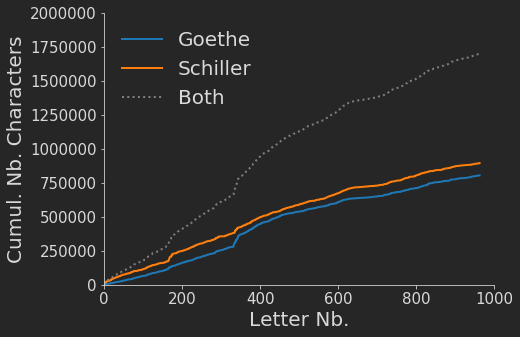

In [54]:
# Cumulative number of words over time per author and in sum
df["cum_words"] = np.cumsum(df.length)
df["cum_words_G"] = np.cumsum([length if author == "Goethe" else 0 for (length, author) in zip(df.length, df.Author)])
df["cum_words_S"] = np.cumsum([length if author == "Schiller" else 0 for (length, author) in zip(df.length, df.Author)])

# Plot
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Cumul. Nb. Characters", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0,1000))
ax.set_ylim((0,2e6))
ax.plot(df.cum_words_G, label="Goethe", lw=2)
ax.plot(df.cum_words_S, label="Schiller", lw=2)
ax.plot(df.cum_words, c="grey", label="Both", lw=2, ls=":")
ax.legend(loc=2, frameon=False, fontsize=20)
plt.savefig("Fig3.svg", bbox_inches="tight")
